First, import needed modules

In [106]:
import numpy as np
import pandas as pd
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely.speedups

Initalize variables

In [107]:
shapely.speedups.enable()
path = os.getcwd()
print(path)

/Users/jan/Dropbox/UP_EPQM/2222/MA/powerlinemonsters


Load shapefile with municipality boundaries and plot it for inspection

<AxesSubplot:>

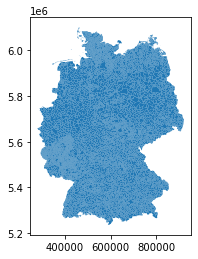

In [85]:
municipalities = gpd.read_file(f'{path}/data/geodata/VG250_GEM.shp')
municipalities.plot()

Inspect the dataframe: GEN has the municipalities' names, geometry the polygons

In [86]:
municipalities.head()

,ADE,GF,BSG,RS,AGS,SDV_RS,GEN,BEZ,IBZ,BEM,...,SN_V2,SN_G,FK_S3,NUTS,RS_0,AGS_0,WSK,EWZ,DEBKG_ID,geometry
0,6,2,1,083355004002,08335002,083355004002,Allensbach,Gemeinde,64,gemeinschaftsangehörig,...,04,002,R,DE138,083355004002,08335002,2009-01-01,0,DEBKGDL20000HKND,"POLYGON ((507883.567 5282624.777, 507923.277 5..."
1,6,2,1,083355004066,08335066,083355004066,Reichenau,Gemeinde,64,gemeinschaftsangehörig,...,04,066,R,DE138,083355004066,08335066,2009-01-01,0,DEBKGDL20000HKNF,"MULTIPOLYGON (((508095.875 5281959.799, 508134..."
2,6,2,1,083350063063,08335063,083350063063,Radolfzell am Bodensee,Stadt,61,None,...,63,063,R,DE138,083350063063,08335063,2009-01-01,0,DEBKGDL20000HKNE,"POLYGON ((500719.668 5285290.972, 500632.566 5..."
3,6,2,1,010595990186,01059186,010595990186,Steinbergkirche,Gemeinde,64,gemeinschaftsangehörig,...,90,186,R,DEF0C,010595990186,01059186,2013-03-01,0,DEBKGDL20000XYFA,"POLYGON ((547082.162 6075557.922, 547528.602 6..."
4,6,2,1,033595407018,03359018,033595407018,Freiburg (Elbe),Gemeinde,64,gemeinschaftsangehörig,...,07,018,K,DE939,033595407018,03359018,2009-01-01,0,DEBKGDL20000QMG4,"POLYGON ((517934.141 5968832.380, 519053.640 5..."


The data use the European Terrestrial Reference System 1989 as coordinate reference systems (CRS)

In [87]:
municipalities.crs

<Derived Projected CRS: EPSG:25832>
Name: ETRS89 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 6°E and 12°E: Austria; Belgium; Denmark - onshore and offshore; Germany - onshore and offshore; Norway including - onshore and offshore; Spain - offshore.
- bounds: (6.0, 38.76, 12.0, 84.33)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Load shapefile with power lines and plot it for inspection, as the CRS of powerlines is EPSG4326 (Degrees), convert to EPSG 25832 (Meters)

In [88]:
powerlines = gpd.read_file(f'{path}/data/geodata/powerlines.shp')
powerlines = powerlines.to_crs(epsg=25832)
powerlines.head()

,# BBPlG 20,Start,End,New,Retro,geometry
0,3,Brunsbüttel,Großgartach,1,0,"LINESTRING (509169.440 5972099.313, 509180.155..."
1,4,Wilster,Grafenrheinfeld,1,0,"LINESTRING (524519.730 5975050.664, 585751.695..."
2,5,Bad Lauchstädt,Meitingen,1,0,"LINESTRING (699592.896 5696894.010, 636525.563..."
3,17,Mecklar,Grafenrheinfeld,1,0,"LINESTRING (553510.774 5640922.638, 585751.695..."


Check CRS conversion

In [90]:
powerlines.crs

<Derived Projected CRS: EPSG:25832>
Name: ETRS89 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 6°E and 12°E: Austria; Belgium; Denmark - onshore and offshore; Germany - onshore and offshore; Norway including - onshore and offshore; Spain - offshore.
- bounds: (6.0, 38.76, 12.0, 84.33)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Plot for inspection

<AxesSubplot:>

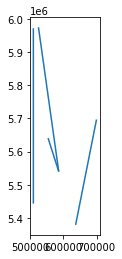

In [91]:
powerlines.plot()

Combine both in a plot and save

<Figure size 432x288 with 0 Axes>

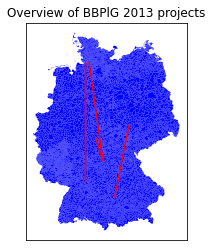

In [117]:
plt.figure(facecolor='white')
fig, ax = plt.subplots()
ax.set_aspect('equal')
municipalities.plot(ax=ax, color='blue')
powerlines.plot(ax=ax, color='red', markersize=5)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.title('Overview of BBPlG 2013 projects')
plt.savefig(f'{path}/figures/BBPLG2013_projects.png', dpi=300)


Combine powerlines and municipalities

<AxesSubplot:>

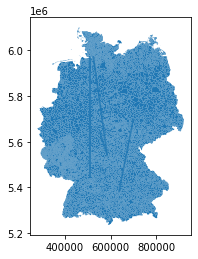

In [93]:
map = gpd.overlay(municipalities, powerlines, how='union', keep_geom_type=False)
map.plot()

Create treatment dataset from municipalities gpd dataframe

In [123]:
treatment = pd.DataFrame(municipalities)
treatment = treatment.reindex(columns=['AGS', 'GEN', 'treated_0'])
treatment.head()

,AGS,GEN,treated_0
0,08335002,Allensbach,NaN
1,08335066,Reichenau,NaN
2,08335063,Radolfzell am Bodensee,NaN
3,01059186,Steinbergkirche,NaN
4,03359018,Freiburg (Elbe),NaN


Now construct the treatment indicator by checking if any of the power lines intersect with municipality polygons

In [143]:
for i in range(len(municipalities)):
    treated = powerlines['geometry'].intersects(municipalities['geometry'].values[i])
    if (treated.any()):
        treatment['treated_0'].loc[treatment.index[i]] = 1
    else:
        treatment['treated_0'].loc[treatment.index[i]] = 0
treatment.head()

,AGS,GEN,treated_0
0,08335002,Allensbach,0
1,08335066,Reichenau,0
2,08335063,Radolfzell am Bodensee,0
3,01059186,Steinbergkirche,0
4,03359018,Freiburg (Elbe),0
